# **Evolutionary Computing, lab 6 - Report**

**Authors**:
* **Kuba Czech**, 156035
* **Wojciech Nagórka**, 156045

## **TODO**
* Pseudocodes
* Conclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Description of the problem** ##

We are given a set of nodes, each defined by its x and y coordinates and an associated cost. The task is to select exactly half of the nodes (rounded up if the number is odd) and construct a Hamiltonian cycle that visits each selected node exactly once and returns to the starting node. The objective is to minimize the total sum of both the path length (computed using rounded Euclidean distances between nodes) and the costs of the selected nodes.

## **2. Pseudocode of implemented algorithms** ##

### **2.1. Data**
**Input:**
- $n$: total number of nodes  
- $nodes[i] = (x_i, y_i, cost_i)$ for $i \in [0, n-1]$: array with all nodes
- $distanceMatrix[i][j] = \text{round}\!\left(\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}\right)$: euclidean distance between i-th and j-th node
- $NUM\_OF\_ITERATIONS$: number of basic local search iterations
- $TIME\_LIMIT$: upper limit of running time for ILS algorithm

**Output:**
- $route$: list of nodes forming a closed Hamiltonian cycle  
- $totalCost = \text{distance cost} + \text{node costs}$

### **2.2. Multiple Start Local Search**

```text
function MultipleStartLocalSearch():
    best_route = empty list

    for 1, 2, ..., NUM_of_ITERATIONS:
        route ← getRandomRoute()
        route ← SteepestDescent(route)
        if cost(best_route) < cost(current_route) or best_route is empty:
            best_route ← route
    return best_route

### **2.3. Iterative Local Search**

```text
function IterativeLocalSearch():
    route ← getRandomRoute()
    best_route ← SteepestDescent(route)
    current_route ← copy(best_route)

    while total_time < TIME_LIMIT:
        perturbed_route ← applyPerturbation(current_route)
        
        new_route ← SteepestDescent(perturbed_route)

        if cost(new_route) < cost(current_route):
            current_route = new_route

            if cost(new_route) < cost(best_route):
                best_route ← new_route

### **2.4. Function to apply perturbation**

```text
function applyPerturbation(route):
    for k in 1, 2: //apply 2 random nodes exchanges
        i ← random node
        j ← random node larger than i

        reverse nodes between i+1-th and j-th (including)

    for k in 1, 2:
        i ← random node from the route
        j ← random node from outside of the route
        
    


## **3. Results of computational experiments** ##

### **3.1. Stats** ###

#### **3.1.1. Instance A** 

In [ ]:
stats = pd.read_csv('evaluation/TSPA_stats.csv')
stats

,method_name,min,max,avg,sd
0,MSLS,70585.0,71825.0,71364.65,298.91
1,ILS,69152.0,69895.0,69471.40,229.85


#### **3.1.2. Instance B** 

In [4]:
stats = pd.read_csv('evaluation/TSPB_stats.csv')
stats

,method_name,min,max,avg,sd
0,MSLS,44790.0,46322.0,45583.15,388.16
1,ILS,43477.0,44552.0,43859.30,316.47


### **3.2. Times** ###

Upper limit of time of computation for ILS comes from averaging all times of MSLS runs. In both cases (ILS and MSLS) average running time will be the same, so there is no need to write times twice.

In [15]:
time_a = pd.read_csv('evaluation/TSPA_times.csv', header=None).values[0][0]
time_b = pd.read_csv('evaluation/TSPB_times.csv', header=None).values[0][0]

times = pd.DataFrame({'instance': ['TSPA', 'TSPB'], 'avg_time_ms': [time_a, time_b]})
times.rename(columns={'avg_time_ms': 'average time of one iteration (ms)'}, inplace=True)
times

,instance,average time of one iteration (ms)
0,TSPA,8012
1,TSPB,8040


### **3.3. Number of runs for ILS**

#### **3.3.1. Tabular results**

In [23]:
nr_of_iterations_a = np.array(pd.read_csv('evaluation/TSPA_number_of_iterations.csv', header=None).values).flatten()
nr_of_iterations_b = np.array(pd.read_csv('evaluation/TSPB_number_of_iterations.csv', header=None).values).flatten()

nr_of_iterations_summary = pd.DataFrame([
    {
        'instance': 'TSPA',
        'min': np.min(nr_of_iterations_a),
        'max': np.max(nr_of_iterations_a),
        'avg': np.mean(nr_of_iterations_a)
    },
    {
        'instance': 'TSPB',
        'min': np.min(nr_of_iterations_b),
        'max': np.max(nr_of_iterations_b),
        'avg': np.mean(nr_of_iterations_b)
    }
])
nr_of_iterations_summary

,instance,min,max,avg
0,TSPA,5436,5504,5468.55
1,TSPB,5331,5560,5442.75


#### **3.3.2. Histogram**

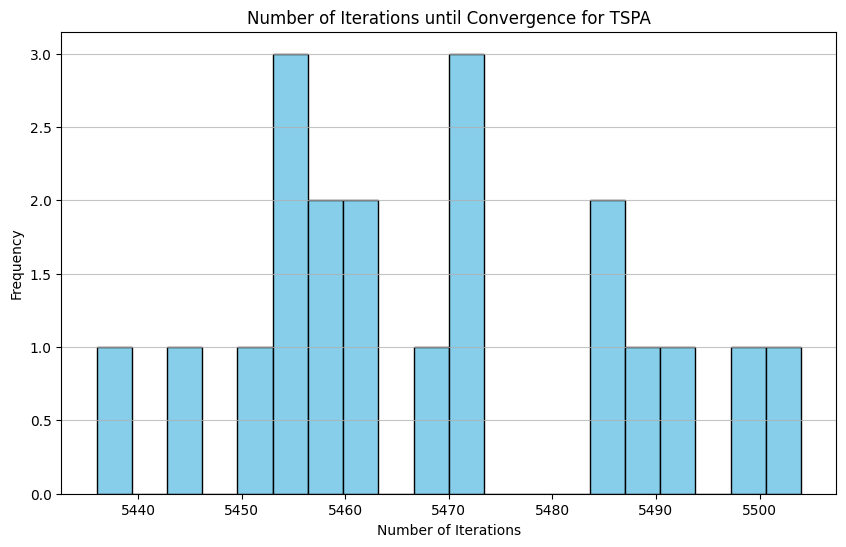

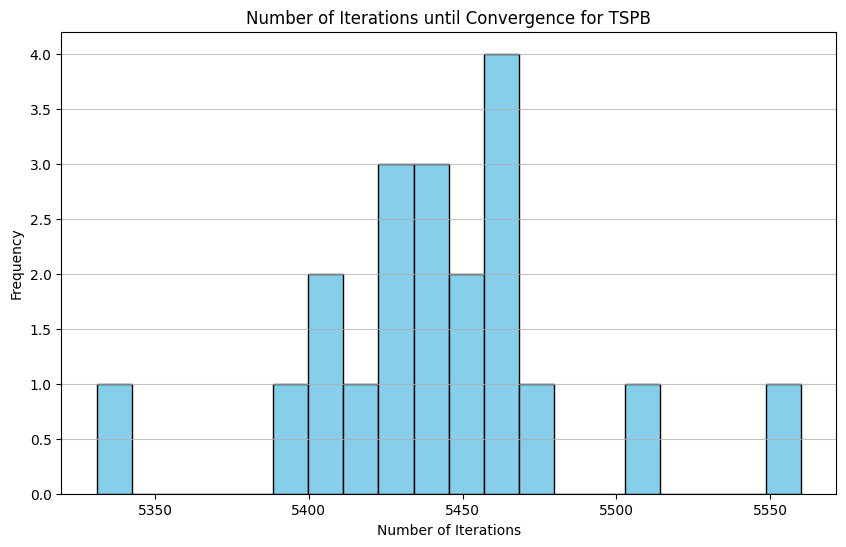

In [ ]:
def plot_histogram(instance_name, nr_of_iterations):
    plt.figure(figsize=(10, 6))
    plt.hist(nr_of_iterations, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Number of Iterations until Convergence for {instance_name}')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_histogram('TSPA', nr_of_iterations_a)
plot_histogram('TSPB', nr_of_iterations_b)

#### **3.3.3. Barchart**

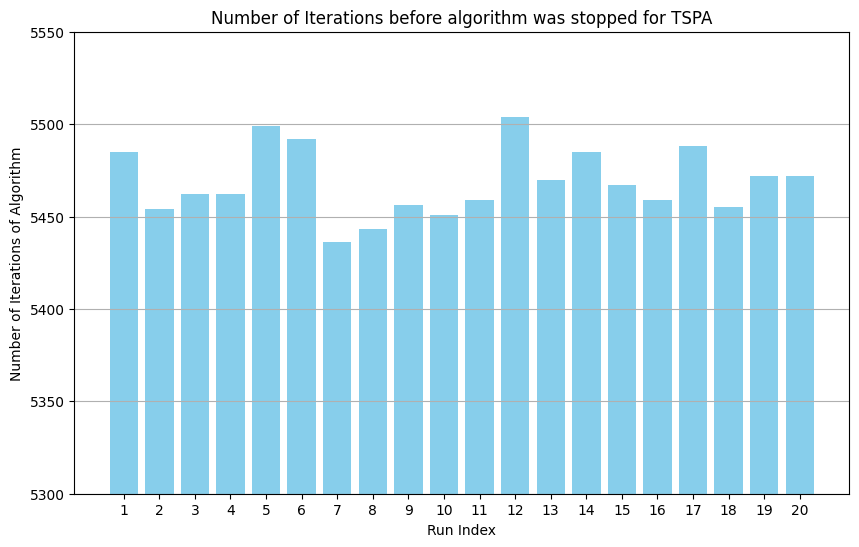

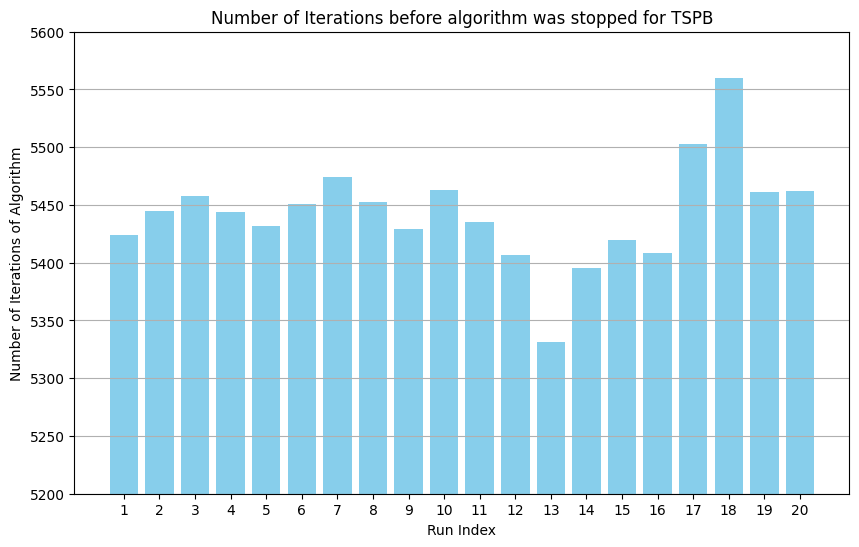

In [39]:
def plot_barchart(instance_name, nr_of_iterations):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(nr_of_iterations)+1), nr_of_iterations, color='skyblue')
    
    plt.xlabel('Run Index')
    plt.ylabel('Number of Iterations of Algorithm')
    plt.title(f'Number of Iterations before algorithm was stopped for {instance_name}')
    lower_limit = (min(nr_of_iterations) - 100)// 50 * 50
    upper_limit = (max(nr_of_iterations) + 50)// 50 * 50
    plt.ylim(lower_limit, upper_limit)

    plt.xticks(range(1, len(nr_of_iterations)+1))
    plt.grid(axis='y')
    plt.show()

plot_barchart('TSPA', nr_of_iterations_a)
plot_barchart('TSPB', nr_of_iterations_b)

## **4. 2D Visualization** ##

### **Reading TSP A and TSP B instances** ##

In [11]:
tsp_a = pd.read_csv('../data/TSPA.csv', sep=';', header=None)
tsp_a.columns = ['x', 'y', 'cost']

tsp_b = pd.read_csv('../data/TSPB.csv', sep=';', header=None)
tsp_b.columns = ['x', 'y', 'cost']

### **Reading files with best solutions** ##

In [12]:
tsp_a_msls = np.array(pd.read_csv('evaluation/results/TSPA_MSLS_best.csv', sep=';', header=None).values).flatten()
tsp_a_ils = np.array(pd.read_csv('evaluation/results/TSPA_ILS_best.csv', sep=';', header=None).values).flatten()

In [13]:
tsp_b_msls = np.array(pd.read_csv('evaluation/results/TSPB_MSLS_best.csv', sep=';', header=None).values).flatten()
tsp_b_ils = np.array(pd.read_csv('evaluation/results/TSPB_ILS_best.csv', sep=';', header=None).values).flatten()

In [14]:
def plot_tsp(tsp, solution, title):
    unused_nodes = np.array(set(tsp.index).difference(solution))
    X = tsp['x'].loc[solution].values
    Y = tsp['y'].loc[solution].values
    costs = tsp['cost'].loc[solution].values

    X_unused = tsp['x'].loc[unused_nodes].values
    Y_unused = tsp['y'].loc[unused_nodes].values
    costs_unused = tsp['cost'].loc[unused_nodes].values

    plt.figure(figsize=(15, 9))
    plt.scatter(X, Y, s=costs, color='red', alpha=0.4, label='Data points')
    plt.scatter(X_unused, Y_unused, s=costs_unused, color="grey", alpha=0.4, label="Unused nodes")
    plt.scatter(X, Y, color='blue')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.plot(X, Y, color='blue', linestyle='-', linewidth=2, label='Connecting line')

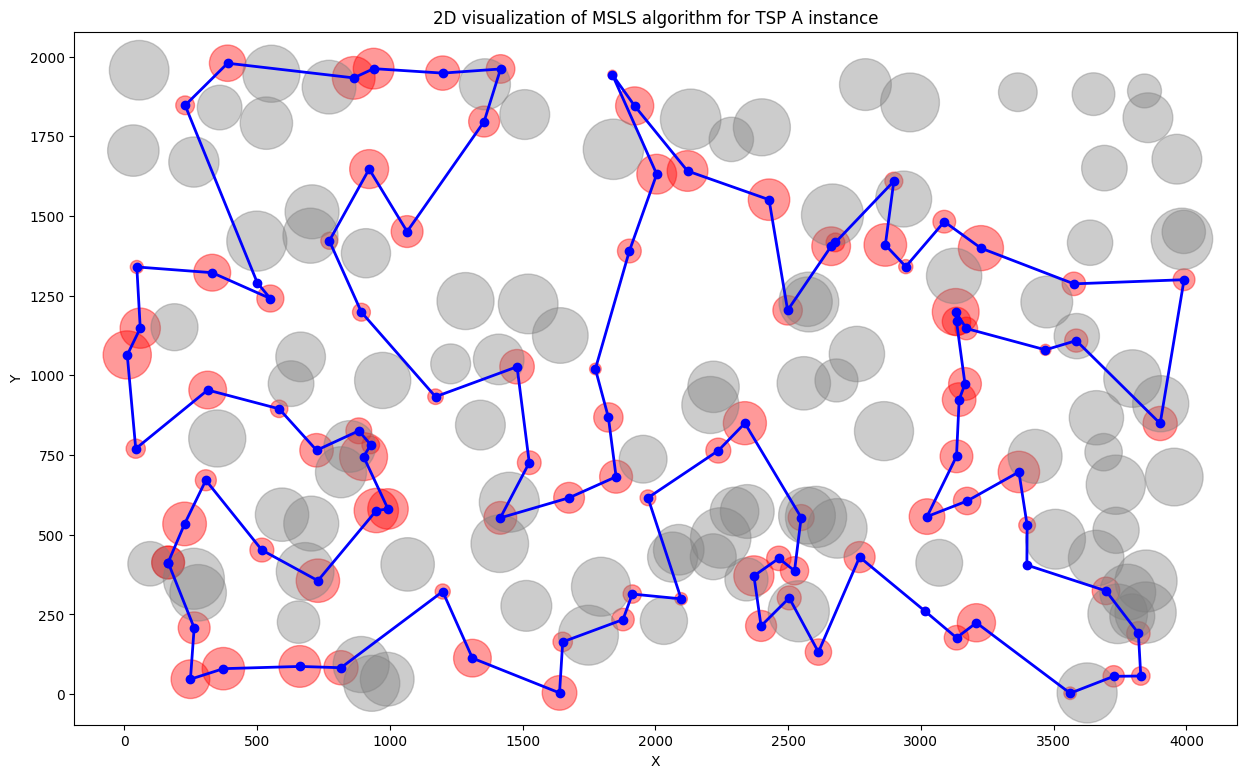

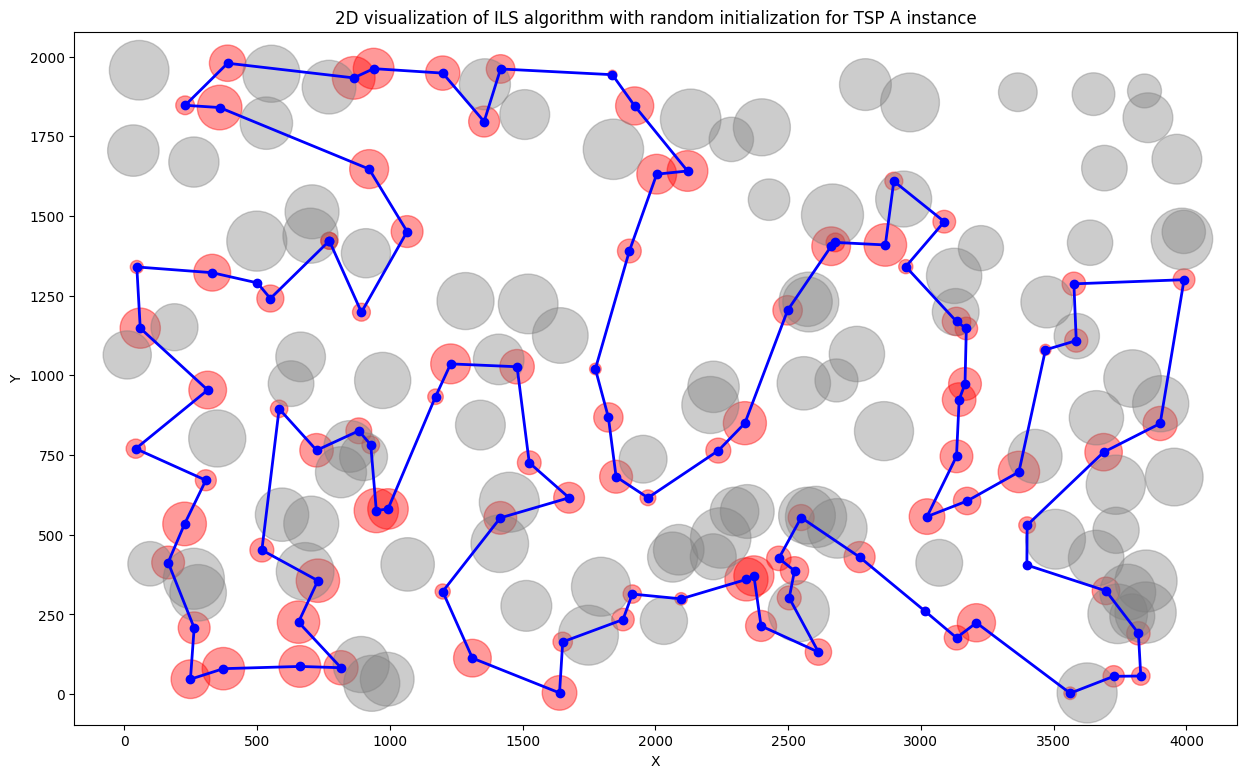

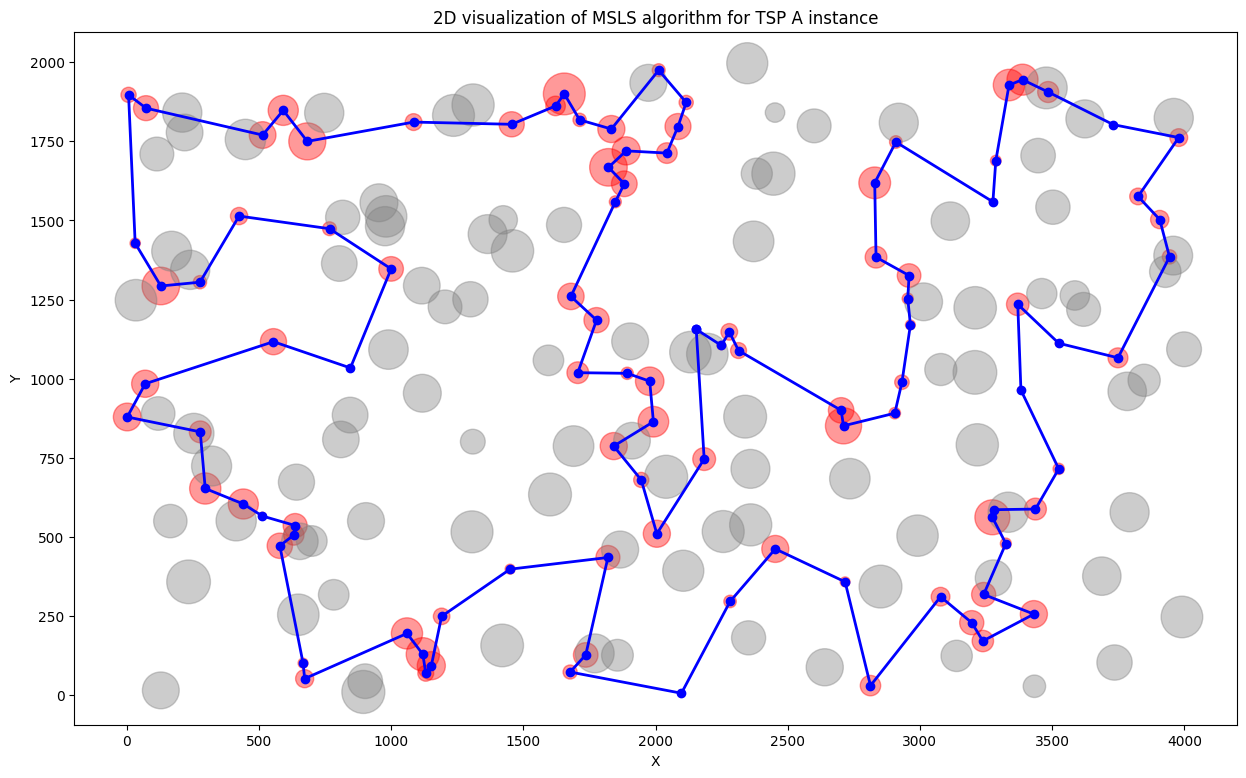

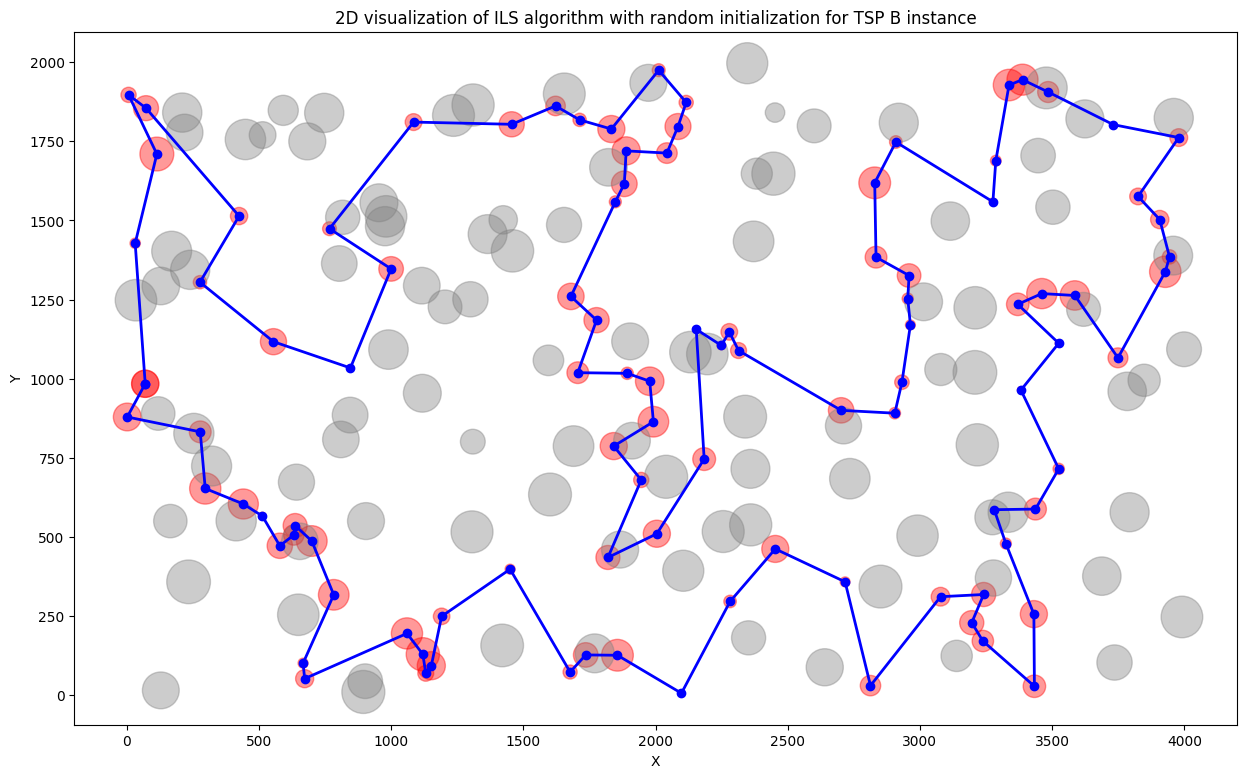

In [16]:
instances = [
    (tsp_a, tsp_a_msls, '2D visualization of MSLS algorithm for TSP A instance'),
    (tsp_a, tsp_a_ils, '2D visualization of ILS algorithm with random initialization for TSP A instance'),
    (tsp_b, tsp_b_msls, '2D visualization of MSLS algorithm for TSP A instance'),
    (tsp_b, tsp_b_ils, '2D visualization of ILS algorithm with random initialization for TSP B instance'),
]
for i in instances:
    plot_tsp(*i)

## **5. Display of the results** ##

### **5.1. TSP A instance** ###
#### **5.1.1. Multiple Start Local Search solution** ####

In [19]:
tsp_a_msls

array([ 54,  48, 160, 184,  35, 131, 149,  47,  65, 116,  43,  42, 181,
        34, 103, 146,  22, 159,  41, 193,  18, 108, 140,  93, 117, 143,
         0,  46,  68, 139, 115,  59,  51, 151, 162, 133,  79,  80, 176,
       137,  23, 183,  89, 186,  15, 148,   9,  62, 144, 102,  49,  14,
       138, 165,  90,  81,  40, 185, 106,   3, 178,  52,  55,  57, 129,
        92, 179, 145,  78,  31, 113, 175, 171,  16,  25,  44, 120,   2,
        75, 101,  86,  26,  97,   1, 152, 124,  94,  63,  53, 180, 154,
       135,  70, 127, 123, 112,   4, 190,  10, 177,  54])

#### **5.1.2. Iterative Local Search solution** ####

In [20]:
tsp_a_ils

array([139,  41, 193, 159,  22, 146, 181,  34, 160,  48,  54, 177,  10,
       190,   4, 112,  84,  35, 184,  42,  43, 116,  65, 131, 149,  59,
       118,  51, 151, 133, 162, 123, 127,  70, 135, 154, 180,  53, 100,
        26,  86,  75, 101,   1,  97, 152,   2, 120,  44,  25,  16, 171,
       175, 113,  31,  78, 145, 196,  81,  90, 165,  40, 185, 179,  92,
       129,  57,  55,  52, 106, 178,  49,  14, 144, 102,  62,   9, 148,
       124,  94,  63,  79,  80, 176, 137,  23, 186,  89, 183, 143,   0,
       117,  93, 140, 108,  18,  69,  68,  46, 115, 139])

### **5.2. TSP B instance** ###

#### **5.2.1. Multistart Local Search solution** ####

In [21]:
tsp_b_msls

array([ 29,   0, 109,  35, 143, 159, 106, 124,  62,  18,  55,  34, 170,
       152, 183, 140,   4, 149,  28,  20,  60, 148,  47,  94, 179, 185,
        95,  86, 166, 194, 176, 180, 113, 103, 114, 127,  89, 163, 187,
       153,  81,  77, 141,  36,  61,  21, 177,   5,  78, 175, 142,  45,
        80, 190, 193,  31,  54, 117, 198, 156,   1,  27,  38, 131, 121,
        51,  90, 122, 135, 102,  63,  40, 107, 133,  10, 178, 147,   6,
       188,  65, 169, 132,  70,   3,  15, 145,  13, 126, 195, 168, 139,
        11, 138,  33, 160, 144, 104,   8,  82, 111,  29])

#### **5.2.2. Iterative Local Search solution** ####

In [22]:
tsp_b_ils

array([ 38,  63, 100,  40, 107, 122, 135, 131, 121,  51,  90, 147,   6,
       188, 169, 132,  70,   3,  15, 145,  13, 195, 168, 139,  11, 138,
        33, 160, 144, 104,   8,  21,  82, 111,  29,   0, 109,  35, 143,
       106, 124,  62,  18,  55,  34, 170, 152, 183, 140,   4, 149,  28,
        20,  60, 148,  47,  94,  66, 179,  99, 130,  95, 185,  86, 166,
       194, 176, 113, 114, 137, 127,  89, 103, 163, 187, 153,  81,  77,
       141,  91,  61,  36, 177,   5,  78, 175, 142,  45,  80, 190, 136,
        73,  54,  31, 193, 117, 198, 156,   1,  27,  38])

## **6. Usage of solution checker**

Solution checker was used for all computed above solutions and value of objective functions are correct.

## **7. Link to the source code** ##

https://github.com/WojtekNagorka/Evolutionary-computation/tree/main/lab6

## **8. Conclusions**

1. Steepest LM finds equally good results than classic version of steepest algorithm
2. Steepest LM is much faster than steepest algorithm (more less 4 times faster)
3. Usage of LM is beneficial in local search